# Import 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 

%load_ext autoreload
%autoreload 2

# EPG Dataset

In [2]:
from dataset_utils.dataset import EPGDataset

In [116]:
dataset = EPGDataset(data_path = '../data', dataset_name = 'zt')

Reading ...


100%|██████████| 32/32 [00:27<00:00,  1.15it/s]


In [4]:
dataset.plot(recording_name='SBA-Rag5_6-3-2016-ch7', mode = 'interactive', smoothen = True)

<Figure size 1800x300 with 0 Axes>

In [7]:
dataset.generate_sliding_windows()

Generating sliding windows ...
Sub-dataset SBA-Rag5.


100%|██████████| 32/32 [00:36<00:00,  1.16s/it]


Total: 32 recordings.
Signal processing method: raw | Scale: True.
Class distribution (label:ratio): 0: 0.31, 1: 0.22, 2: 0.01, 3: 0.08, 4: 0.04, 5: 0.14, 6: 0.2
Labels map (from:to): {1: 0, 2: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6}


In [21]:
dataset.stats()

,count,ratio,mean,std,max,min,median,Q1,Q3
np,444,0.390,809.990,3142.608,26074.93,2.90,95.800,42.615,245.212
c,3136,0.260,76.465,154.667,3742.36,0.42,43.630,20.218,84.240
e1,62,0.011,169.811,245.526,1253.41,23.54,77.935,48.405,160.550
e2,43,0.095,2042.358,3977.394,21982.18,6.92,431.260,179.285,1773.705
f,51,0.049,893.994,2171.734,13503.78,2.87,55.740,8.850,725.115
g,90,0.178,1826.480,3982.980,21109.85,1.28,98.220,33.683,1529.580
pd,2520,0.015,5.494,4.383,201.02,0.18,5.110,4.520,5.890


In [13]:
import matplotlib.pyplot as plt 

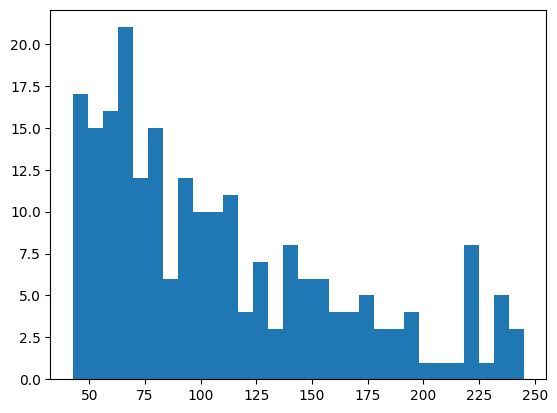

In [28]:
waveform = 'np'
clipped = np.clip(dataset.durations[waveform], dataset.stats[waveform]['Q1'], dataset.stats[waveform]['Q3'])
tmp = np.array(dataset.durations[waveform])
tmp = tmp[tmp > dataset.stats[waveform]['Q1']]
tmp = tmp[tmp < dataset.stats[waveform]['Q3']]
plt.hist(tmp, bins = 30)
plt.show()

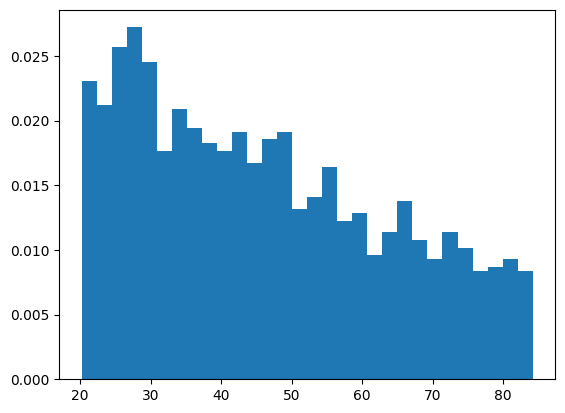

In [34]:
waveform = 'c'
clipped = np.clip(dataset.durations[waveform], dataset.stats[waveform]['Q1'], dataset.stats[waveform]['Q3'])
tmp = np.array(dataset.durations[waveform])
tmp = tmp[tmp > dataset.stats[waveform]['Q1']]
tmp = tmp[tmp < dataset.stats[waveform]['Q3']]
plt.hist(tmp, bins = 30, density=True)
plt.show()

# Data statistics

In [ ]:
columns = ['NP','C','E1','E2','F','G','pd','dataset']
df = pd.DataFrame(columns = columns)
all_configs = ['fcn.BCOA1.raw.256.json',
 'fcn.BCOA2.raw.256.json',
 'fcn.cannabis_aphid.raw.256.json',
 'fcn.green_peach_aphid.raw.256.json',
 'fcn.soybean_aphid.raw.256.json',
 ]
for config in all_configs:
    
    config = process_config(config)
    # data, data_test = datagenerator.generate_inputs(data_names= config.dataset_name)
    # average length of the wave forms
    window_size = config.window_size
    hop_length = config.hop_length
    method = config.method
    scale = config.scale
    outlier_filter = config.outlier_filter
    subdatasets = get_dataset_group(config.dataset_name)

    data = {}
    for subset in subdatasets:
        all_recordings = get_filename(subset)
        for n in all_recordings:
            data[n] = read_signal(n)
            
    info = {'np': {'sum': 0, 'count':0},
            'c':  {'sum': 0, 'count':0},
            'e1': {'sum': 0, 'count':0},
            'e2': {'sum': 0, 'count':0},
            'f':  {'sum': 0, 'count':0},
            'g':  {'sum': 0, 'count':0},
            'pd': {'sum': 0, 'count':0}}
                    
    lengths = {'np': [], 'c': [], 'e1': [], 'e2': [], 'f': [], 'g': [], 'pd': []}
    total_length = 0

    for key in data.keys():
        a = data[key][1]
        wave_infos = datahelper.get_index(a)
        for wave_type in wave_infos.keys():
            for idx in wave_infos[wave_type]:
                lengths[wave_type].append(idx[1] - idx[0])
                info[wave_type]['sum'] += idx[1] - idx[0]
                info[wave_type]['count'] +=1
        total_length += a.iloc[-1]['time']

    for wave_type in info.keys():
        info[wave_type]['ratio'] = round(info[wave_type]['sum']/total_length,3)
        info[wave_type]['mean'] = round(np.mean(lengths[wave_type]),3)
        # info[wave_type]['max'] = round(np.max(lengths[wave_type]),3)
        # info[wave_type]['min'] = round(np.min(lengths[wave_type]),3)
        info[wave_type]['std'] = round(np.std(lengths[wave_type]),3)
        # info[wave_type]['median'] = round(np.median(lengths[wave_type]),3)
        # info[wave_type]['Q1'] = round(np.quantile(lengths[wave_type],0.25),3)
        # info[wave_type]['Q3'] = round(np.quantile(lengths[wave_type],0.75),3)
    
    tmp = pd.DataFrame(info).drop(['sum','count'])
    tmp['dataset'] = [config.dataset_name]*3
    df = pd.concat([df,tmp], axis = 0)

C:\Users\dqdun\AppData\Local\Temp\ipykernel_684\3171647292.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,tmp], axis = 0)


In [ ]:
df 

,np,c,e1,e2,f,g,pd,dataset
ratio,0.067,0.128,0.042,0.651,0.084,0.020,0.008,1
mean,289.319,61.378,214.258,6688.297,789.273,1298.234,4.848,1
std,860.409,98.239,402.059,8697.330,1373.318,1771.836,1.872,1
ratio,0.258,0.213,0.094,0.242,0.002,0.182,0.009,2
mean,916.736,96.943,602.909,3812.744,627.625,2079.763,5.110,2
std,2769.701,485.141,1417.084,6125.552,707.751,3275.484,12.167,2
ratio,0.265,0.301,0.039,0.186,0.048,0.145,0.016,3
mean,454.589,76.169,434.203,2466.593,365.223,2326.815,4.948,3
std,1581.669,230.164,886.299,4407.480,958.540,3225.023,1.091,3
ratio,0.052,0.680,0.021,0.165,0.008,0.056,0.017,4


In [ ]:
df.to_csv('dataset_summary.csv')

In [ ]:
# dataset_summary = pd.read_csv('dataset_summary.csv', index_col= [0])
dataset_summary = df 
dratio = dataset_summary[dataset_summary.index == 'ratio']
dratio.set_index('dataset', inplace = True)
dmean = dataset_summary[dataset_summary.index == 'mean']
dmean.set_index('dataset', inplace = True)
dsd = dataset_summary[dataset_summary.index == 'std']
dsd.set_index('dataset', inplace = True)

In [ ]:
species = ['BCOA1','BCOA2','CA','GPA','SA']
weight_counts = {
    "NP": dratio['np'],
    "C": dratio['c'],
    "E1": dratio['e1'],
    "E2": dratio['e2'],
    "F": dratio['f'],
    "G": dratio['g'],
    "pd": dratio['pd'],
}

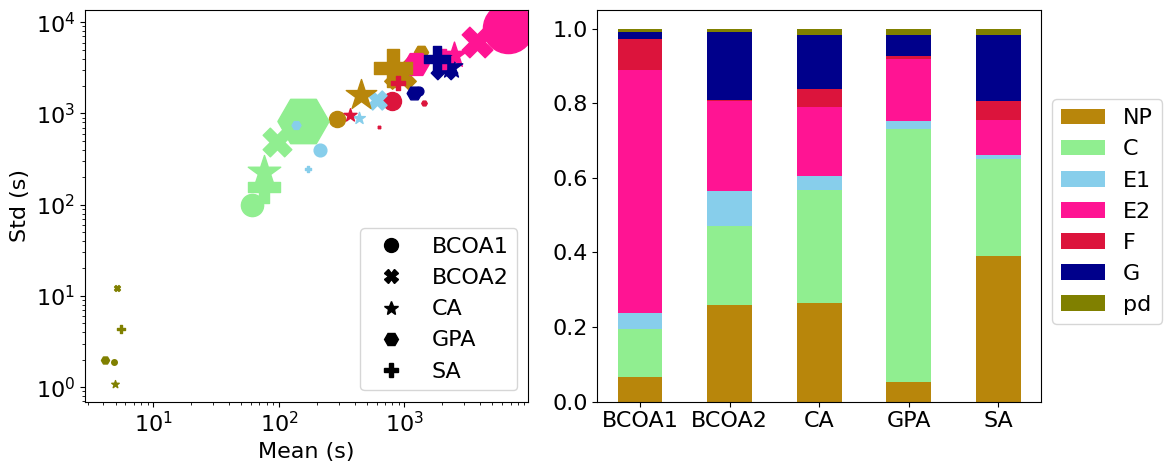

In [ ]:
plt.rcParams.update({"font.size":16})
from matplotlib.lines import Line2D
width = 0.5
color = visualization.c
markers = ['o', 'X', '*', 'H', 'P']

f, (ax2, ax1) = plt.subplots(1,2, figsize=(12,5))
bottom = np.zeros(len(species))

for i, (boolean, weight_count) in enumerate(weight_counts.items()):
    p = ax1.bar(species, weight_count, width, label=boolean, bottom=bottom, color = color[list(color.keys())[i]])
    bottom += weight_count
    
# ax1.set_title("Ratio of waveforms appeared in each dataset")
ax1.legend(ncol = 1, bbox_to_anchor=(1, 0.8))
n = len(species)
ax1.set_xticks(np.arange(n), ax1.get_xticklabels())

for dataset in range(n):
    for i in range(7):
        ax2.scatter(dmean.iloc[dataset,i],dsd.iloc[dataset,i], marker = markers[dataset], color = color[list(color.keys())[i]], s = dratio.iloc[dataset,i]*2000)
ax2.set_xlabel('Mean (s)')
ax2.set_ylabel('Std (s)')
ax2.set_xscale('log')
ax2.set_yscale('log')
custom_lines = []
for m in markers:
    custom_lines.append(Line2D([0], [0], marker = m, lw = 0, markersize = 10, color = 'black'))
ax2.legend(custom_lines, ['BCOA1', 'BCOA2', 'CA', 'GPA', 'SA'], ncol = 1, loc = 'lower right')
# ax2.set_title('Mean/sd of the duration of each waveform')
plt.subplots_adjust(hspace= 2)
plt.tight_layout()
plt.show()